In [1]:
# All libraries needed
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
first_half = pd.read_csv('./Raw_data_DEMO_GAME/OPTICAL_TRACKING/TXT/bepro_tracking_data_FIRST_HALF.csv', sep=';')
first_half

,Frame,Player1,Player2,Player3,Player4,Player5,Player6,Player7,Player8,Player9,...,Player15,Player16,Player17,Player18,Player19,Player20,Player21,Player22,Ball,Status
0,251,"9852,3365","6945,1418","7183,3132","7129,4197","6790,5851","6157,335","6063,42","5290,2483","5272,1855",...,"4387,2975","5173,4494","4458,395","3635,1193","3457,2955","3401,3953","3655,5174","1072,3381","5250,34",BALL_OUT
1,252,"9853,3364","6944,1421","7183,3132","7131,4195","6789,5852","6157,335","6063,4198","5291,2482","5272,1858",...,"4388,2978","5173,4492","4456,3947","3635,1193","3457,2956","3400,3952","3655,5174","1071,3381","5250,3404",BALL_OUT
2,253,"9853,3363","6943,1424","7183,3131","7133,4193","6787,5853","6158,335","6063,4195","5291,2482","5272,186",...,"4388,298","5173,449","4454,3945","3635,1194","3456,2956","3399,3952","3655,5174","1070,3381","5251,3407",BALL_OUT
3,254,"9853,3362","6942,1426","7182,313","7133,4192","6786,5854","6158,335","6063,4193","5291,2482","5271,1863",...,"4389,2983","5173,4489","4453,3943","3635,1195","3454,2956","3397,3952","3655,5174","1070,3381","5251,341",BALL_OUT
4,255,"9854,336","6942,1429","7182,3129","7134,419","6785,5855","6158,335","6063,4192","5290,2482","5270,1865",...,"4389,2985","5173,4488","4451,3941","3635,1195","3453,2956","3396,3952","3655,5174","1069,3381","5251,3413",BALL_OUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71920,72171,"7713,3737","4211,2715","5148,4097","4129,4983","4691,6038","2997,4951","2774,5783","1859,5122","1794,3268",...,"1637,5315","3243,4511","1558,448","1693,3034","1374,3914","3084,5277","1642,6805","607,3962","3460,5067",AWAY
71921,72172,"7711,3738","4211,2717","5146,4098","4126,4985","4690,6039","2994,4951","2774,5783","1859,5124","1792,327",...,"1635,5317","3244,4511","1558,448","1693,3036","1371,3915","3087,5275","1640,6807","610,3963","3460,5067",AWAY
71922,72173,"7710,374","4211,2719","5144,41","4124,4987","4689,604","2991,495","2774,5783","1859,5127","1791,3273",...,"1633,5318","3245,4511","1558,448","1694,3037","1368,3916","3091,5274","1637,6808","612,3965","3460,5067",AWAY
71923,72174,"7709,3741","4212,2721","5142,4101","4121,4989","4688,6041","2988,495","2774,5783","1859,5129","1791,3276",...,"1630,5319","3246,4512","1558,4481","1695,304","1365,3917","3095,5273","1635,6809","614,3966","3460,5067",AWAY


In [3]:
X = {}
Y = {}

for t in range(len(first_half)):
    for i in first_half.columns[1:-1]:
        X[t,i] = first_half[i][t].split(',')[0]
        X[t,i] = int(X[t,i])
    
        Y[t,i] = first_half[i][t].split(',')[-1]
        Y[t,i] = int(Y[t,i])
    

In [4]:
team_H = first_half.columns[1:12]
team_V = first_half.columns[13:-2]

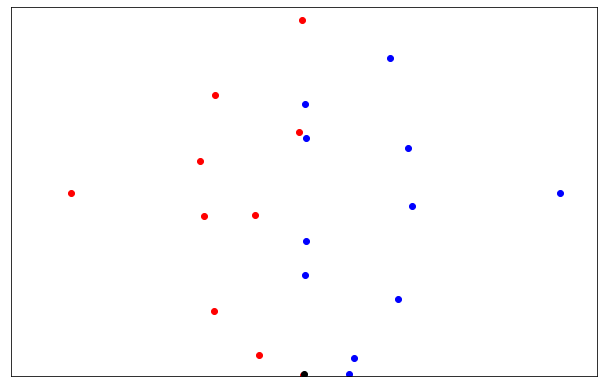

In [6]:
plt.figure(figsize=(10.5,6.8))
for i in first_half.columns[1:-1]:    
    if i in team_H:
        plt.scatter(X[0,i],Y[0,i],c='b')
    if i in team_V:
        plt.scatter(X[0,i],Y[0,i],c='r')
    if i == 'Ball':
        plt.scatter(X[0,i],Y[0,i],c='k')
    plt.xlim(0,10500)
    plt.ylim(0,6800)
    plt.xticks([])
    plt.yticks([])

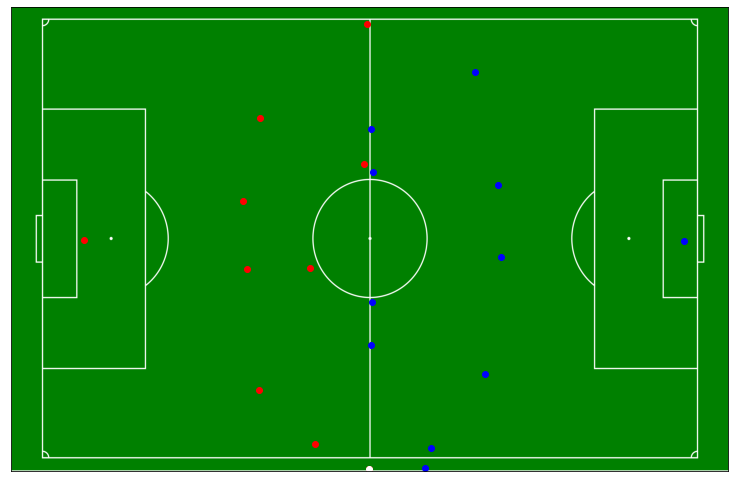

In [13]:
plt.rcParams["figure.figsize"] = [10.5, 6.8]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("./image/field.png")
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 10500, 0, 6800])
for i in first_half.columns[1:-1]:    
    if i in team_H:
        plt.scatter(X[0,i],Y[0,i],c='b')
    if i in team_V:
        plt.scatter(X[0,i],Y[0,i],c='r')
    if i == 'Ball':
        plt.scatter(X[0,i],Y[0,i],c='w')
    #plt.xlim(0,10500)
    #plt.ylim(0,6800)
    plt.xticks([])
    plt.yticks([])
plt.show()

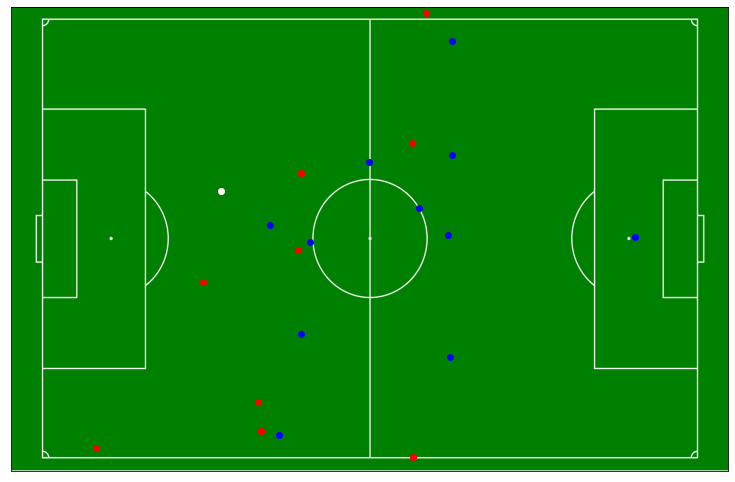

In [15]:
plt.rcParams["figure.figsize"] = [10.5, 6.8]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("./image/field.png")
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 10500, 0, 6800])
for i in first_half.columns[1:-1]:    
    if i in team_H:
        plt.scatter(X[110,i],Y[110,i],c='b')
    if i in team_V:
        plt.scatter(X[110,i],Y[110,i],c='r')
    if i == 'Ball':
        plt.scatter(X[110,i],Y[110,i],c='w')
    #plt.xlim(0,10500)
    #plt.ylim(0,6800)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
for t in range(len(first_half)):
    plt.figure(figsize=(10.5,6.8))
    for i in first_half.columns[1:-1]:    
        if i in team_H:
            plt.scatter(X[t,i],Y[t,i],c='b')
        if i in team_V:
            plt.scatter(X[t,i],Y[t,i],c='r')
        if i == 'Ball':
            plt.scatter(X[t,i],Y[t,i],c='k')
    plt.xlim(0,10500)
    plt.ylim(0,6800)
    plt.xticks([])
    plt.yticks([])
    #plt.savefig('./fig/%i.png'%t)

/home/cseceh/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
